In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
%load_ext autoreload

%autoreload 2
import utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
stock_list = ['TATACONSUM.NS','KOTAKBANK.NS','SHREECEM.NS','TCS.NS','WIPRO.NS','BRITANNIA.NS','GRASIM.NS','BAJFINANCE.NS','ULTRACEMCO.NS','NESTLEIND.NS','CIPLA.NS'
,'BAJAJ-AUTO.NS','TECHM.NS','HDFCLIFE.NS','ITC.NS','ONGC.NS','HEROMOTOCO.NS','BHARTIARTL.NS','INDUSINDBK.NS','BAJAJFINSV.NS','LT.NS','TITAN.NS',
'COALINDIA.NS','MARUTI.NS','NTPC.NS','HINDALCO.NS','RELIANCE.NS','ICICIBANK.NS','TATASTEEL.NS']

In [7]:
# stock_list = ['NIFTYBEES.NS','0P0000XUY3.BO']

In [8]:
all_data = utils.stock_data(stock_list, '5y', '1d')

[*********************100%***********************]  29 of 29 completed


In [9]:
all_data.head()

Date     Adj Close                                            \
              BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS   
0  2016-07-05   2343.937012   2310.950439    809.551819    325.595673   
1  2016-07-07   2342.501465   2320.086182    802.184631    323.326538   
2  2016-07-08   2337.162354   2302.364258    813.297424    315.940796   
3  2016-07-11   2377.048340   2355.379150    848.939392    320.212036   
4  2016-07-12   2379.516113   2425.217773    854.850098    323.282013   

                                                                 ...   Volume  \
  BRITANNIA.NS    CIPLA.NS COALINDIA.NS   GRASIM.NS HDFCLIFE.NS  ...  ONGC.NS   
0  1305.324951  496.849731   226.112473  680.835327         NaN  ...  6551590   
1  1292.852661  504.003540   221.617584  682.718201         NaN  ...  5971878   
2  1290.965820  509.883453   218.913651  681.285400         NaN  ...  3248257   
3  1315.910156  511.549377   225.375000  684.781189         NaN  ...  6210183   
4  1314.966675  505.375549   222.671066  696.093872         NaN  ...  4319643   

                                                                        \
  RELIANCE.NS SHREECEM.NS TATACONSUM.NS TATASTEEL.NS   TCS.NS TECHM.NS   
0     5242583        5450        942568      4139013  1559748   456205   
1     5551423       14426       2125346     10629149  3316800  1036078   
2     3295393        9636       1296935      8149659  2456356   733349   
3     3815035       14038       1689644      8074066  1543632   729356   
4     4507697       10879       1612081     10377039  1465536   931824   

                                   
  TITAN.NS ULTRACEMCO.NS WIPRO.NS  
0   608931        360033  2415735  
1   442528        203141  3807009  
2   332694        308236  2324188  
3   896345        218218  2754551  
4   602537        301384  1749450  

[5 rows x 175 columns]

In [10]:
data = all_data['Close']
data.index = all_data['Date']

data.head()

,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,GRASIM.NS,HDFCLIFE.NS,HEROMOTOCO.NS,...,ONGC.NS,RELIANCE.NS,SHREECEM.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,2612.149902,2314.649902,817.000000,335.961456,1418.125000,507.000000,321.950012,702.988403,NaN,3111.100098,...,153.833328,491.887390,14882.099609,133.899994,317.880585,1242.650024,515.250000,401.899994,3375.149902,211.856308
2016-07-07,2610.550049,2323.800049,809.565002,333.620117,1404.574951,514.299988,315.549988,704.932617,NaN,3102.699951,...,151.066666,489.311798,15486.400391,134.449997,302.684418,1214.900024,504.549988,402.850006,3382.399902,209.850052
2016-07-08,2604.600098,2306.050049,820.780029,325.999237,1402.525024,520.299988,311.700012,703.453186,NaN,3167.800049,...,148.866669,484.606415,15648.500000,132.600006,303.303711,1213.300049,502.950012,401.450012,3400.050049,210.618805
2016-07-11,2649.050049,2359.149902,856.750000,330.406494,1429.625000,522.000000,320.899994,707.062744,NaN,3244.550049,...,150.000000,491.590210,15926.000000,133.100006,311.544891,1232.074951,508.399994,402.649994,3454.550049,213.318802
2016-07-12,2651.800049,2429.100098,862.715027,333.574188,1428.599976,515.700012,317.049988,718.743469,NaN,3248.250000,...,151.933334,496.989044,16032.150391,132.899994,326.121765,1232.474976,507.200012,406.049988,3487.300049,214.050049


In [12]:
data.columns = [str(column).split(".")[0].lower().replace("-","") for column in data.columns]
data.head()

,bajajauto,bajajfinsv,bajfinance,bhartiartl,britannia,cipla,coalindia,grasim,hdfclife,heromotoco,...,ongc,reliance,shreecem,tataconsum,tatasteel,tcs,techm,titan,ultracemco,wipro
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,2612.149902,2314.649902,817.000000,335.961456,1418.125000,507.000000,321.950012,702.988403,NaN,3111.100098,...,153.833328,491.887390,14882.099609,133.899994,317.880585,1242.650024,515.250000,401.899994,3375.149902,211.856308
2016-07-07,2610.550049,2323.800049,809.565002,333.620117,1404.574951,514.299988,315.549988,704.932617,NaN,3102.699951,...,151.066666,489.311798,15486.400391,134.449997,302.684418,1214.900024,504.549988,402.850006,3382.399902,209.850052
2016-07-08,2604.600098,2306.050049,820.780029,325.999237,1402.525024,520.299988,311.700012,703.453186,NaN,3167.800049,...,148.866669,484.606415,15648.500000,132.600006,303.303711,1213.300049,502.950012,401.450012,3400.050049,210.618805
2016-07-11,2649.050049,2359.149902,856.750000,330.406494,1429.625000,522.000000,320.899994,707.062744,NaN,3244.550049,...,150.000000,491.590210,15926.000000,133.100006,311.544891,1232.074951,508.399994,402.649994,3454.550049,213.318802
2016-07-12,2651.800049,2429.100098,862.715027,333.574188,1428.599976,515.700012,317.049988,718.743469,NaN,3248.250000,...,151.933334,496.989044,16032.150391,132.899994,326.121765,1232.474976,507.200012,406.049988,3487.300049,214.050049


In [13]:
data.tail()

,bajajauto,bajajfinsv,bajfinance,bhartiartl,britannia,cipla,coalindia,grasim,hdfclife,heromotoco,...,ongc,reliance,shreecem,tataconsum,tatasteel,tcs,techm,titan,ultracemco,wipro
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-29,4124.649902,12299.900391,6052.399902,524.950012,3657.149902,979.599976,144.500000,1503.300049,686.500000,2927.500000,...,119.400002,2087.800049,28134.449219,758.049988,1172.550049,3340.850098,1088.150024,1731.599976,6824.700195,542.599976
2021-06-30,4133.850098,12109.049805,6015.850098,525.650024,3649.649902,971.900024,146.649994,1498.750000,686.299988,2902.600098,...,117.699997,2110.649902,27504.599609,754.400024,1166.599976,3345.750000,1095.449951,1732.500000,6776.000000,545.650024
2021-07-01,4204.549805,11816.450195,5967.149902,522.650024,3595.800049,978.099976,145.649994,1500.300049,685.750000,2922.500000,...,118.849998,2097.949951,27059.949219,756.049988,1163.550049,3341.500000,1085.150024,1740.300049,6707.250000,539.349976
2021-07-02,4175.350098,11750.450195,5997.750000,525.000000,3545.300049,979.200012,147.649994,1489.750000,687.500000,2919.850098,...,118.449997,2129.050049,27014.900391,763.599976,1136.000000,3325.449951,1089.400024,1754.750000,6719.899902,538.599976
2021-07-05,4201.500000,11923.099609,6072.700195,523.950012,3523.550049,974.700012,149.899994,1489.699951,677.900024,2938.050049,...,120.949997,2150.199951,26987.599609,766.299988,1156.849976,3321.000000,1074.650024,1749.900024,6719.850098,536.349976


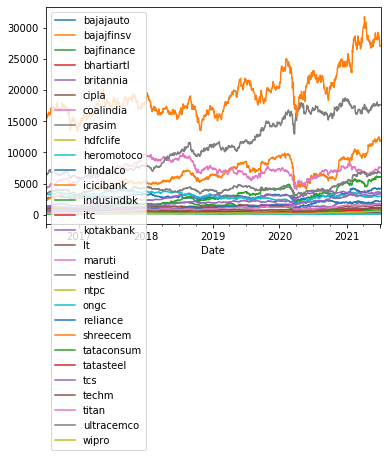

In [14]:
data.plot()

### Checking for null data

In [126]:
data.isna().sum()

bajajauto       0
bajajfinsv      0
bajfinance      0
bhartiartl      0
britannia       0
cipla           0
coalindia       0
grasim          0
hdfclife      339
heromotoco      0
hindalco        0
icicibank       0
indusindbk      0
itc             0
kotakbank       0
lt              0
maruti          0
nestleind       0
ntpc            0
ongc            0
reliance        0
shreecem        0
tataconsum      0
tatasteel       0
tcs             0
techm           0
titan           0
ultracemco      0
wipro           0
dtype: int64

### Treating NaN

In [15]:
data = data.fillna(method = "bfill")

In [16]:
data.isna().sum()

bajajauto     0
bajajfinsv    0
bajfinance    0
bhartiartl    0
britannia     0
cipla         0
coalindia     0
grasim        0
hdfclife      0
heromotoco    0
hindalco      0
icicibank     0
indusindbk    0
itc           0
kotakbank     0
lt            0
maruti        0
nestleind     0
ntpc          0
ongc          0
reliance      0
shreecem      0
tataconsum    0
tatasteel     0
tcs           0
techm         0
titan         0
ultracemco    0
wipro         0
dtype: int64

### Checking for uniqueness in index

In [17]:
print(len(data.index))
print(len(data.index.unique()))
print(data.index.dtype)
assert len(data.index) == len(data.index.unique())

1232
1232
period[D]


In [18]:
r,dr,ar,av = utils.all_returns(data, "monthly")

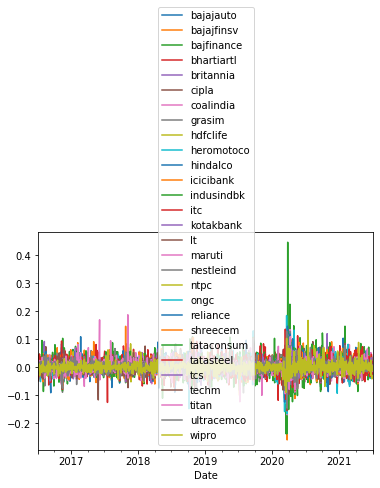

In [19]:
r.plot()

In [20]:
dr

bajajauto     0.000386
bajajfinsv    0.001333
bajfinance    0.001631
bhartiartl    0.000361
britannia     0.000740
cipla         0.000531
coalindia    -0.000621
grasim        0.000610
hdfclife      0.000550
heromotoco   -0.000046
hindalco      0.000933
icicibank     0.000867
indusindbk   -0.000066
itc          -0.000145
kotakbank     0.000690
lt            0.000294
maruti        0.000487
nestleind     0.000807
ntpc         -0.000057
ongc         -0.000195
reliance      0.001199
shreecem      0.000484
tataconsum    0.001418
tatasteel     0.001050
tcs           0.000799
techm         0.000597
titan         0.001196
ultracemco    0.000560
wipro         0.000755
dtype: float64

In [21]:
ar

bajajauto     0.102183
bajajfinsv    0.398734
bajfinance    0.507775
bhartiartl    0.095240
britannia     0.204802
cipla         0.143168
coalindia    -0.144858
grasim        0.166183
hdfclife      0.148562
heromotoco   -0.011647
hindalco      0.264800
icicibank     0.244196
indusindbk   -0.016526
itc          -0.035964
kotakbank     0.189896
lt            0.076758
maruti        0.130540
nestleind     0.225513
ntpc         -0.014176
ongc         -0.048039
reliance      0.352511
shreecem      0.129583
tataconsum    0.429201
tatasteel     0.302704
tcs           0.222913
techm         0.162396
titan         0.351417
ultracemco    0.151390
wipro         0.209434
dtype: float64

In [22]:
av

bajajauto     0.266474
bajajfinsv    0.373353
bajfinance    0.421217
bhartiartl    0.344249
britannia     0.257273
cipla         0.283031
coalindia     0.299441
grasim        0.341583
hdfclife      0.291186
heromotoco    0.307076
hindalco      0.410082
icicibank     0.363760
indusindbk    0.486111
itc           0.271792
kotakbank     0.287534
lt            0.277425
maruti        0.310536
nestleind     0.244378
ntpc          0.264098
ongc          0.356785
reliance      0.310889
shreecem      0.302500
tataconsum    0.348836
tatasteel     0.383851
tcs           0.259336
techm         0.305505
titan         0.338737
ultracemco    0.293261
wipro         0.267721
dtype: float64

In [23]:
utils.sharp_ratio(ar,av,0.03)                                                 

bajajauto     0.270883
bajajfinsv    0.987628
bajfinance    1.134273
bhartiartl    0.189515
britannia     0.679440
cipla         0.399844
coalindia    -0.583947
grasim        0.398682
hdfclife      0.407170
heromotoco   -0.135625
hindalco      0.572569
icicibank     0.588839
indusindbk   -0.095711
itc          -0.242701
kotakbank     0.556095
lt            0.168543
maruti        0.323762
nestleind     0.800044
ntpc         -0.167270
ongc         -0.218730
reliance      1.037385
shreecem      0.329199
tataconsum    1.144380
tatasteel     0.710444
tcs           0.743871
techm         0.433366
titan         0.948868
ultracemco    0.413931
wipro         0.670225
dtype: float64

In [24]:
drawdowns = pd.DataFrame()
wealth = pd.DataFrame()
prev_peak = pd.DataFrame()
for column in data.columns:
    dr = utils.drawdown(r[column])
    drawdowns[column] = dr['Drawdown']
    wealth[column] = dr['Wealth']
    prev_peak[column] = dr["Previous Peak"]

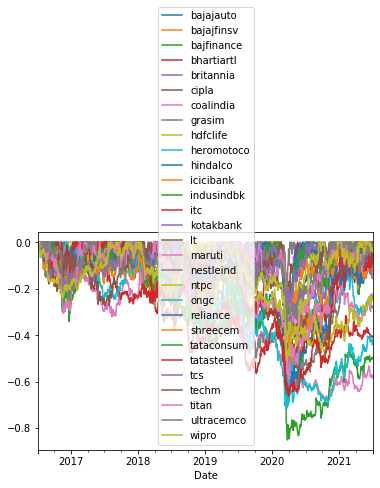

In [25]:
drawdowns.plot()

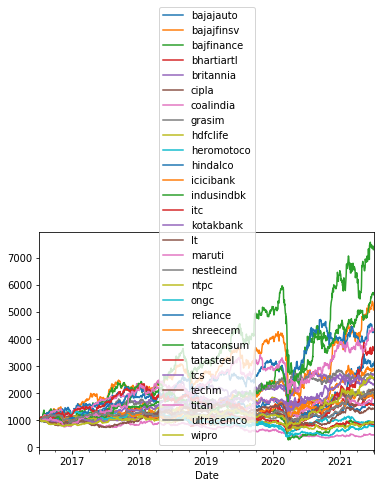

In [26]:
wealth.plot()

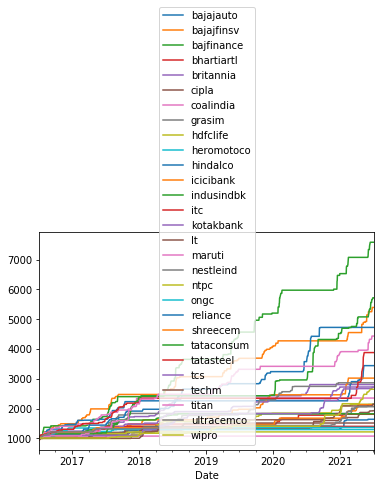

In [27]:
prev_peak.plot()

In [28]:
ma10 = pd.DataFrame(index = data.index)
ma50 = pd.DataFrame(index = data.index)
ma40 = pd.DataFrame(index = data.index)
ma200 = pd.DataFrame(index = data.index)

In [29]:
for column in data.columns:
    ma10[column] = data[column].rolling(10).mean()
    ma50[column] = data[column].rolling(50).mean()
    ma40[column] = data[column].rolling(40).mean()
    ma200[column] = data[column].rolling(200).mean()
    

In [30]:
ma10 = ma10.fillna(method = 'bfill')
ma40 = ma40.fillna(method = 'bfill')
ma50 = ma50.fillna(method = 'bfill')
ma200 = ma200.fillna(method = 'bfill')


In [31]:
share1 = pd.DataFrame(index = data.index)
share2 = pd.DataFrame(index = data.index)
for column in data.columns:
    share1[column] = [1 if ma10.loc[ei,column] > ma50.loc[ei,column] else 0 for ei in data.index]
    share2[column] = [1 if ma40.loc[ei,column] > ma200.loc[ei,column] else 0 for ei in data.index]

In [32]:
share2.tail()

,bajajauto,bajajfinsv,bajfinance,bhartiartl,britannia,cipla,coalindia,grasim,hdfclife,heromotoco,...,ongc,reliance,shreecem,tataconsum,tatasteel,tcs,techm,titan,ultracemco,wipro
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-29,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2021-06-30,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2021-07-01,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2021-07-02,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2021-07-05,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [34]:
scale = 5000
kt,kt_mean = utils.get_thresholds_mean_k(data,scale)

In [35]:
kt.head()

,bajajauto,bajajfinsv,bajfinance,bhartiartl,britannia,cipla,coalindia,grasim,hdfclife,heromotoco,...,ongc,reliance,shreecem,tataconsum,tatasteel,tcs,techm,titan,ultracemco,wipro
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-07,2.092651,1.869315,1.184437,1.064561,1.382579,1.128865,1.047574,1.166817,1.074022,2.639896,...,1.013188,1.103304,-0.526511,1.031737,1.016842,1.301008,1.091737,1.089976,3.083817,1.034357
2016-07-08,2.087763,1.854050,1.209723,1.047018,1.388627,1.127657,1.054338,1.161683,1.074022,2.690618,...,1.016138,1.097819,-0.481799,1.013493,1.066616,1.319229,1.108709,1.083851,3.107128,1.047632
2016-07-11,2.122956,1.898748,1.248827,1.084210,1.416719,1.119793,1.097962,1.169697,1.074022,2.795077,...,1.038534,1.123281,-0.477876,1.031116,1.093504,1.340843,1.123888,1.090549,3.175190,1.057359
2016-07-12,2.129008,1.949468,1.215184,1.081023,1.399409,1.103094,1.055761,1.183945,1.074022,2.851521,...,1.044215,1.121218,-0.460674,1.025804,1.116347,1.327421,1.110562,1.096767,3.265975,1.048146


In [36]:
kt_mean.tail()

,bajajauto,bajajfinsv,bajfinance,bhartiartl,britannia,cipla,coalindia,grasim,hdfclife,heromotoco,...,ongc,reliance,shreecem,tataconsum,tatasteel,tcs,techm,titan,ultracemco,wipro
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-29,2.624118,14.510216,2.495040,1.087730,2.435705,1.139259,1.047811,1.223685,1.105485,2.775781,...,1.029789,1.350093,-0.368930,1.066809,1.119178,1.695267,1.154780,1.239908,3.642430,1.055032
2021-06-30,2.626900,14.497841,2.489067,1.087744,2.436769,1.139358,1.047782,1.223846,1.105517,2.775489,...,1.029765,1.350393,-0.368802,1.066893,1.119324,1.696339,1.154869,1.240146,3.637296,1.055080
2021-07-01,2.629422,14.485486,2.483195,1.087769,2.437810,1.139434,1.047780,1.224010,1.105561,2.775177,...,1.029749,1.350707,-0.368674,1.066979,1.119471,1.697415,1.154977,1.240382,3.632118,1.055139
2021-07-02,2.632060,14.473141,2.477202,1.087788,2.438795,1.139524,1.047760,1.224177,1.105604,2.774872,...,1.029752,1.351007,-0.368552,1.067071,1.119618,1.698490,1.155069,1.240624,3.626895,1.055183
2021-07-05,2.634995,14.460782,2.470963,1.087816,2.439666,1.139609,1.047757,1.224336,1.105649,2.774571,...,1.029745,1.351330,-0.368436,1.067171,1.119742,1.699548,1.155172,1.240872,3.621561,1.055236


In [37]:
pred = pd.DataFrame(index = data.index)
for column in data.columns:
     prediction = [kt.loc[ei,column]*data.loc[ei,column]*(scale - data.loc[ei,column])/scale for ei in pred.index]
     pred[column] = prediction
    #  pred[column] = pred[column].shift(1)

In [38]:
pred.tail()

,bajajauto,bajajfinsv,bajfinance,bhartiartl,britannia,cipla,coalindia,grasim,hdfclife,heromotoco,...,ongc,reliance,shreecem,tataconsum,tatasteel,tcs,techm,titan,ultracemco,wipro
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-29,4359.520115,12093.175398,6157.602609,519.499098,3674.716594,992.349366,141.928450,1493.586465,678.460829,2934.304191,...,116.591604,2088.310853,27576.150365,751.872474,1164.695051,3336.709544,1076.122865,1733.274623,6617.939546,538.421829
2021-06-30,4099.525882,11609.490468,5771.852498,526.268635,3662.507270,966.107369,148.766075,1496.158055,686.131848,2912.488449,...,116.064610,2117.007897,26156.785032,751.413629,1162.484465,3340.761725,1100.740910,1732.923163,6548.090298,548.341749
2021-07-01,3927.391632,11056.322580,5635.092581,520.015577,3684.023868,982.824407,144.686618,1501.186812,685.287815,2914.617869,...,119.982968,2094.492334,26096.474785,757.409094,1161.431418,3345.829275,1077.782576,1743.962135,6382.190320,533.876694
2021-07-02,4298.559183,11571.681054,6219.245706,527.083752,3621.220164,980.033162,149.615790,1483.733497,688.974882,2920.923562,...,118.061016,2137.456779,26914.851020,769.853348,1117.066878,3341.504289,1092.479374,1761.476698,6782.458799,537.941451
2021-07-05,4093.748404,12407.711339,6610.464017,523.024815,3554.292770,971.306544,152.113714,1489.671143,669.922088,2930.497197,...,123.439512,2155.562366,26926.892791,768.519429,1171.725746,3325.369423,1064.098217,1747.671424,6719.605702,534.378740


In [39]:
data.tail()

,bajajauto,bajajfinsv,bajfinance,bhartiartl,britannia,cipla,coalindia,grasim,hdfclife,heromotoco,...,ongc,reliance,shreecem,tataconsum,tatasteel,tcs,techm,titan,ultracemco,wipro
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-29,4124.649902,12299.900391,6052.399902,524.950012,3657.149902,979.599976,144.500000,1503.300049,686.500000,2927.500000,...,119.400002,2087.800049,28134.449219,758.049988,1172.550049,3340.850098,1088.150024,1731.599976,6824.700195,542.599976
2021-06-30,4133.850098,12109.049805,6015.850098,525.650024,3649.649902,971.900024,146.649994,1498.750000,686.299988,2902.600098,...,117.699997,2110.649902,27504.599609,754.400024,1166.599976,3345.750000,1095.449951,1732.500000,6776.000000,545.650024
2021-07-01,4204.549805,11816.450195,5967.149902,522.650024,3595.800049,978.099976,145.649994,1500.300049,685.750000,2922.500000,...,118.849998,2097.949951,27059.949219,756.049988,1163.550049,3341.500000,1085.150024,1740.300049,6707.250000,539.349976
2021-07-02,4175.350098,11750.450195,5997.750000,525.000000,3545.300049,979.200012,147.649994,1489.750000,687.500000,2919.850098,...,118.449997,2129.050049,27014.900391,763.599976,1136.000000,3325.449951,1089.400024,1754.750000,6719.899902,538.599976
2021-07-05,4201.500000,11923.099609,6072.700195,523.950012,3523.550049,974.700012,149.899994,1489.699951,677.900024,2938.050049,...,120.949997,2150.199951,26987.599609,766.299988,1156.849976,3321.000000,1074.650024,1749.900024,6719.850098,536.349976


In [40]:
share3 = pd.DataFrame(index = data.index)
for column in data.columns:
    # share3[column] = [1 if pred.loc[ei,column] > data.loc[ei,column] else 0 for ei,k in enumerate(data.index)]
    share3[column] = [1 if pred.loc[ei,column] > ma10.loc[ei,column] else 0 for k,ei in enumerate(data.index)]

In [41]:
share3.tail()

,bajajauto,bajajfinsv,bajfinance,bhartiartl,britannia,cipla,coalindia,grasim,hdfclife,heromotoco,...,ongc,reliance,shreecem,tataconsum,tatasteel,tcs,techm,titan,ultracemco,wipro
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-29,1,0,1,0,1,1,0,1,0,1,...,0,0,0,1,1,1,1,0,0,0
2021-06-30,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,1,1,0,0,1
2021-07-01,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,1,1,0,0,0,0
2021-07-02,1,0,1,0,0,1,1,0,0,1,...,0,0,0,1,0,1,1,1,0,0
2021-07-05,0,1,1,0,0,1,1,0,0,1,...,1,1,0,1,1,0,0,0,0,0


In [42]:
profit1 = pd.DataFrame(index = data.index)
profit2 = pd.DataFrame(index = data.index)
profit3 = pd.DataFrame(index = data.index)
close1 = data.shift(-1)
for column in data.columns:
    profit1[column] = [share1.loc[ei,column] * (close1.loc[ei,column] - data.loc[ei,column]) for ei in data.index]
    profit2[column] = [share2.loc[ei,column] * (close1.loc[ei,column] - data.loc[ei,column]) for ei in data.index]
    profit3[column] = [share3.loc[ei,column] * (close1.loc[ei,column] - data.loc[ei,column]) for ei in data.index]

In [43]:
wealth1 = pd.DataFrame(index = data.index)
wealth2 = pd.DataFrame(index = data.index)
wealth3 = pd.DataFrame(index = data.index)

for column in data.columns:
    wealth1[column] = profit1[column].cumsum()
    wealth2[column] = profit2[column].cumsum()
    wealth3[column] = profit3[column].cumsum()

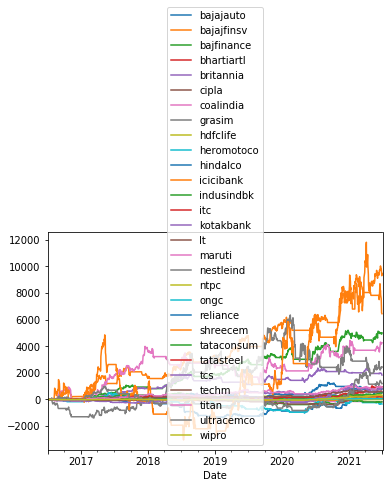

In [44]:
wealth1.plot()

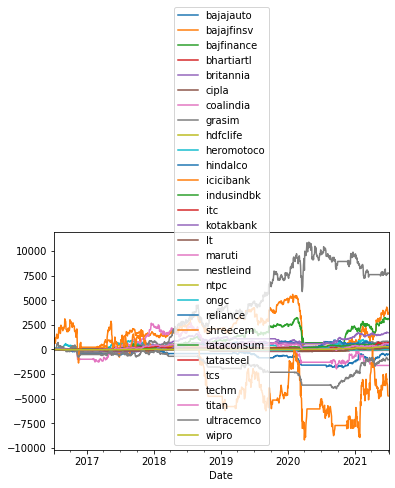

In [45]:
wealth2.plot()

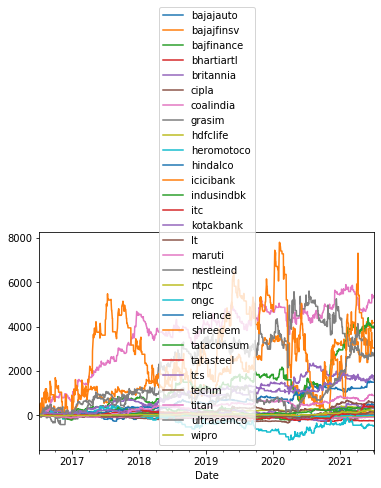

In [46]:
wealth3.plot()

In [47]:
print(wealth1.iloc[-2,:].sum())
print(wealth2.iloc[-2,:].sum())
print(wealth3.iloc[-2,:].sum())

37601.70031738281
13571.406311035156
30569.045303344727


In [48]:

# shares = pd.DataFrame(index = data.index[:-1])
shares = pd.DataFrame(index = data.index[:-1])
for column in data.columns:
    share11 = []
    for k,ei in enumerate(shares.index):
        max_wealth = max(wealth1.loc[ei,column],wealth2.loc[ei,column],wealth3.loc[ei,column])
        
        if max_wealth == wealth1.loc[ei,column]:
            if ma10.loc[ei,column] > ma50.loc[ei,column]:
                share11.append(1)
            else:
                share11.append(0)
        elif max_wealth == wealth2.loc[ei,column]:
        
            if ma40.loc[ei,column] > ma200.loc[ei,column]:
                share11.append(1)
            else:
                share11.append(0)
        elif max_wealth == wealth3.loc[ei,column]:
           
            if pred.loc[ei,column] > ma10.loc[ei,column]:
                share11.append(1)
            else:
                share11.append(0)
    shares[column] = share11
shares

,bajajauto,bajajfinsv,bajfinance,bhartiartl,britannia,cipla,coalindia,grasim,hdfclife,heromotoco,...,ongc,reliance,shreecem,tataconsum,tatasteel,tcs,techm,titan,ultracemco,wipro
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2016-07-07,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2016-07-08,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
2016-07-11,0,0,1,0,0,1,0,0,0,1,...,0,1,1,0,0,1,1,1,0,1
2016-07-12,0,0,1,1,1,0,1,0,0,1,...,1,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-28,1,1,1,0,1,1,0,1,0,0,...,1,0,1,1,1,1,1,1,0,1
2021-06-29,1,1,1,0,1,1,0,1,0,0,...,1,0,1,1,1,1,1,1,0,1
2021-06-30,1,1,1,0,1,1,1,1,0,0,...,1,0,1,1,1,1,1,1,0,1


In [49]:
profit11 = pd.DataFrame(index = shares.index)
close1 = data.shift(-1)
for column in data.columns:
    profit11[column] = [shares.loc[ei,column] * (close1.loc[ei,column] - data.loc[ei,column]) for ei in shares.index]

In [50]:
wealth11 = pd.DataFrame(index = shares.index)

for column in data.columns:
    wealth11[column] = profit11[column].cumsum()

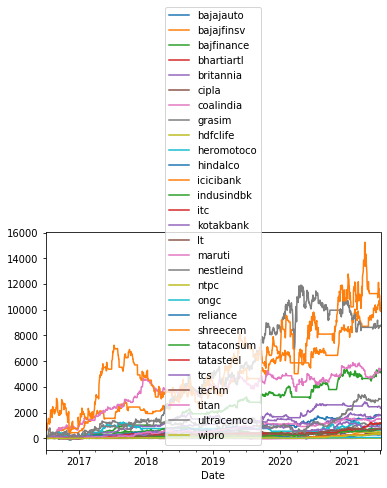

In [51]:
wealth11.plot()

In [52]:
print(wealth11.iloc[-1,:].sum())

60009.922134399414


In [53]:
actual_price = (shares*data).sum()
actual_price

bajajauto     2.160636e+06
bajajfinsv    5.439837e+06
bajfinance    2.499624e+06
bhartiartl    3.158953e+05
britannia     1.833328e+06
cipla         4.753735e+05
coalindia     9.867715e+04
grasim        6.055815e+05
hdfclife      2.530308e+05
heromotoco    1.704768e+06
hindalco      1.647124e+05
icicibank     3.335114e+05
indusindbk    9.804320e+05
itc           1.413667e+05
kotakbank     1.101346e+06
lt            8.631812e+05
maruti        4.477498e+06
nestleind     1.140521e+07
ntpc          7.147705e+04
ongc          8.393375e+04
reliance      8.637430e+05
shreecem      1.431007e+07
tataconsum    3.139279e+05
tatasteel     3.655146e+05
tcs           1.378574e+06
techm         5.636367e+05
titan         8.802831e+05
ultracemco    2.705237e+06
wipro         2.004633e+05
dtype: float64

In [54]:
profits = data.iloc[-1,:]*shares.sum() - actual_price
profits

bajajauto     8.014216e+05
bajajfinsv    4.170181e+06
bajfinance    2.722898e+06
bhartiartl    7.287559e+04
britannia     5.380210e+05
cipla         2.381069e+05
coalindia    -4.111555e+04
grasim        3.448470e+05
hdfclife      7.100546e+04
heromotoco   -1.975481e+05
hindalco      1.134263e+05
icicibank     2.255831e+05
indusindbk   -2.701292e+05
itc          -2.956290e+04
kotakbank     3.631645e+05
lt            1.923838e+05
maruti        3.025558e+05
nestleind     5.689258e+06
ntpc         -4.468051e+03
ongc         -1.656460e+04
reliance      6.198950e+05
shreecem      5.255941e+06
tataconsum    4.125244e+05
tatasteel     3.598303e+05
tcs           9.428051e+05
techm         3.208003e+05
titan         7.681227e+05
ultracemco    1.521549e+06
wipro         1.910722e+05
dtype: float64

In [55]:
print("Total cost: ",actual_price.sum())
print("Total profits: ", profits.sum())
print("Gain percent: ", 100*profits.sum()/actual_price.sum())

Total cost:  56590868.29697418
Total profits:  25678879.69845581
Gain percent:  45.37636631355384


In [56]:
total_cost_starting_today = data.iloc[-1,:].sum()
total_cost_starting_today.sum()

107918.74921417236

In [57]:
returns_final = pd.DataFrame(index = data.columns)
returns_final['cost'] = data.iloc[-1,:]
returns_final['gain'] = 100*profits/actual_price
returns_final =  returns_final.sort_values(by='cost')
returns_final

,cost,gain
ntpc,118.599998,-6.251029
ongc,120.949997,-19.735329
coalindia,149.899994,-41.666741
itc,203.649994,-20.912204
hindalco,389.549988,68.863238
bhartiartl,523.950012,23.069538
wipro,536.349976,95.315299
icicibank,647.849976,67.638795
hdfclife,677.900024,28.061989
tataconsum,766.299988,131.407362


In [58]:
columns2 = returns_final.index[4:-10]
# columns2 = returns_final.index

In [59]:
print("Total cost: ",actual_price[columns2].sum())
print("Total profits: ", profits[columns2].sum())
print("Gain percent: ", 100*profits[columns2].sum()/actual_price[columns2].sum())

Total cost:  8280632.819885254
Total profits:  4023508.4002075195
Gain percent:  48.58938305470323


In [60]:
total_starting_cost = data.iloc[-1,:][columns2].sum()
total_starting_cost

16397.49981689453

In [61]:
actual_price2 = (shares[columns2]*data[columns2]).sum(axis =1)
actual_price2.tail()

Date
2021-06-29    11319.250061
2021-06-30     9784.549988
2021-07-01     8773.050079
2021-07-02     9777.250000
2021-07-05        0.000000
Freq: D, dtype: float64

In [62]:
test_days_number = 106
test_index = data.index[-test_days_number:]
test_data = data[-test_days_number:][columns2]
test_shares = shares[-test_days_number:][columns2]
initial_cash_balance = 200000
min_balance = 0
cash_balance = [initial_cash_balance]
settlement_duration_in_days = 15
for i in range(1,106):
    balance = cash_balance[i-1] - (test_shares.iloc[i,:]*test_data.iloc[i,:]).sum() 
    if balance>0 and i%settlement_duration_in_days !=0:
        cash_balance.append(balance)

    elif balance<=0 and i%settlement_duration_in_days !=0:
        test_shares.iloc[i,:] = [0 for j in range(len(columns2))]
        cash_balance.append(0)
    elif i%settlement_duration_in_days ==0:
        test_shares.iloc[i,:] = test_shares.iloc[i,:] - test_shares.cumsum().iloc[i,:]
        cash_balance.append(cash_balance[i-1]-(test_shares.iloc[i,:]*test_data.iloc[i,:]).sum())

In [63]:
cash_balance

[200000,
 192558.79989624023,
 181810.25003051758,
 171531.1999206543,
 160618.44985961914,
 150413.7999572754,
 138754.90005493164,
 125659.30004882812,
 112525.6999206543,
 100317.25006103516,
 88176.4501953125,
 75554.05032348633,
 60996.35043334961,
 46512.8505859375,
 32464.650665283203,
 206385.1026916504,
 195132.302734375,
 187620.2528076172,
 179198.50289916992,
 166378.80282592773,
 156917.10275268555,
 149058.40280151367,
 138522.35284423828,
 129607.20272827148,
 119639.90267944336,
 111865.75268554688,
 105108.30258178711,
 96853.70248413086,
 87907.3525390625,
 79081.25244140625,
 206590.55200195312,
 201634.25204467773,
 195744.6021118164,
 189898.65203857422,
 183995.4519958496,
 178041.55197143555,
 172096.85195922852,
 167499.90194702148,
 163506.45193481445,
 159387.55200195312,
 152237.00201416016,
 142947.0519104004,
 134123.70193481445,
 123866.85186767578,
 117193.45184326172,
 208942.35217285156,
 198465.751953125,
 189458.40203857422,
 182098.4521484375,
 17497

In [64]:
test_holdings = (test_shares.cumsum().iloc[-1,:]*test_data.iloc[-1,:]).sum()
test_holdings

0.0

In [65]:
final_balance = cash_balance[-1] + test_holdings
test_actual_profit = final_balance - initial_cash_balance
test_actual_profit

16150.750732421875

In [66]:
test_actual_cost = (test_shares*test_data).sum(axis =1)
test_actual_cost.cumsum().max()

171479.09580993652